## General Visualizations: The WHAT
##### All text with no engangement 

In [11]:
import pandas as pd
#import geopandas as gpd
import json
from ast import literal_eval
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("alltext-no-engagement-sentimet.csv", sep = ";")
df['date'] = pd.to_datetime(df['date'])
# Sort by oldest to newest
df = df.sort_values(by="date")

df["COUNTER"] = 1

In [3]:
df['scientific_name'].nunique()

565

In [106]:
top20 = df.groupby(['scientific_name', 'Class'])['COUNTER'].sum().nlargest(20).reset_index()

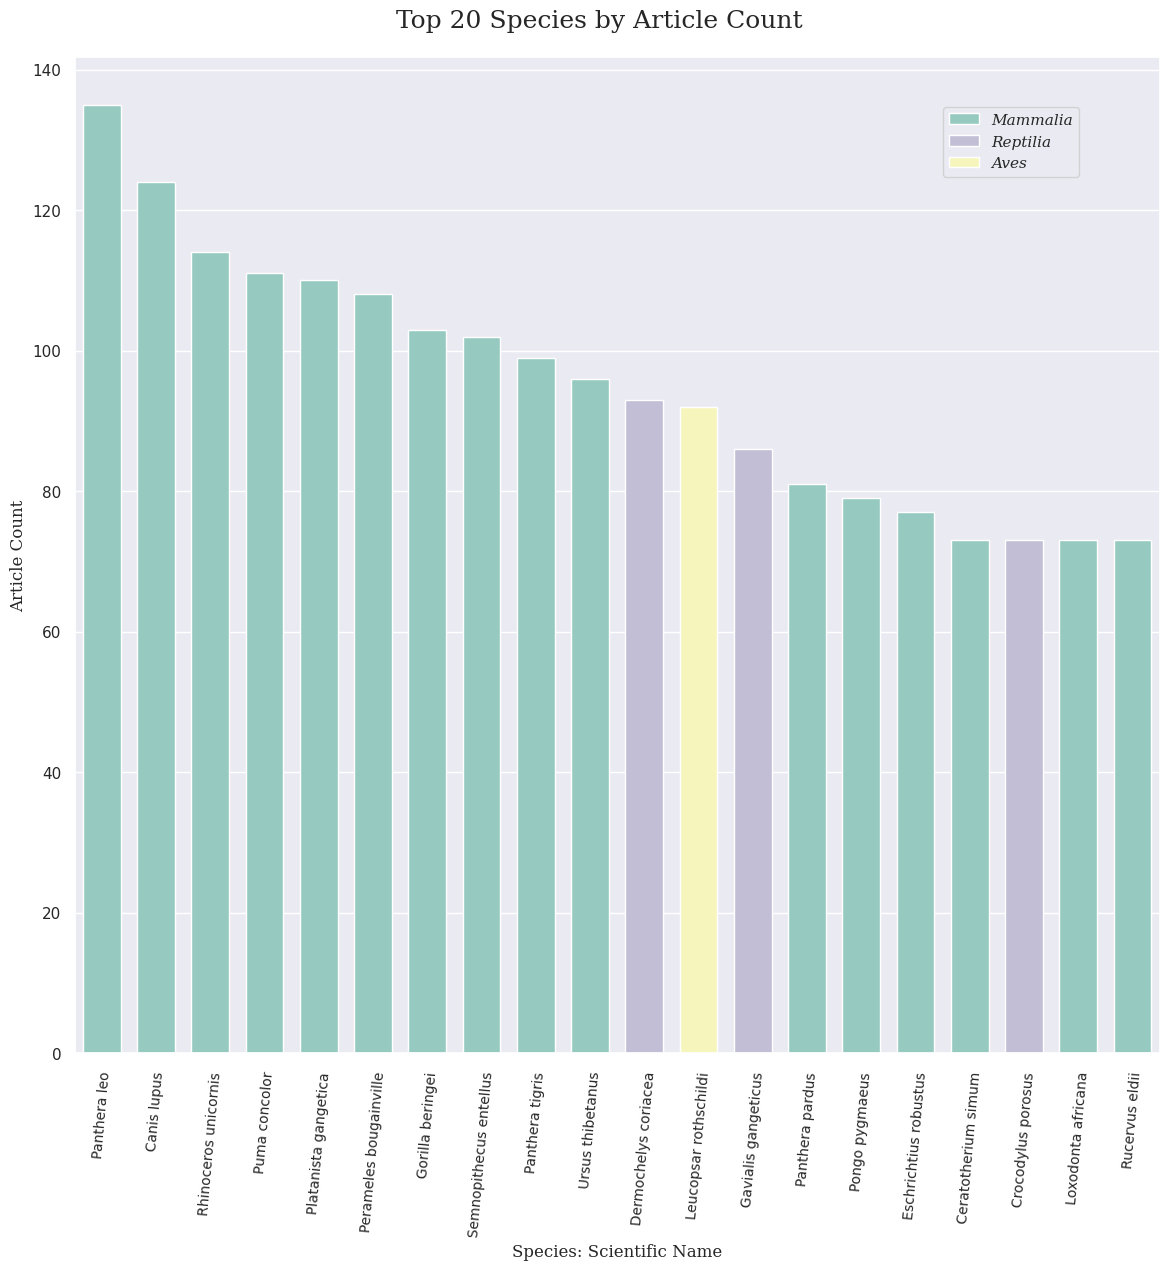

In [110]:
palette = {"Mammalia": "#8dd3c7", "Reptilia": "#bebada", "Aves": "#ffffb3"}

sns.set(rc={'figure.figsize':(14,12)})
ax = sns.barplot(
    x = 'scientific_name',
    y = 'COUNTER',
    hue = 'Class',
    data = top20, 
    width = 0.7, palette = palette, dodge = False
)
ax.set_xlabel('Species: Scientific Name', fontsize=12, family = "Serif")
ax.set_ylabel('Article Count', fontsize=12, family = "Serif")


# Add suptitle above the title
plt.suptitle("Top 20 Species by Article Count\n", fontsize=18, family= 'Serif')
plt.subplots_adjust(top=0.94)

# Add title
#ax.set_title('Page views 2015-2020, English Wiki', fontsize = 14, color="grey", style='italic', family = 'Serif')


ax.tick_params(axis='x', rotation=85, length = 9, labelsize = 10, left = True)
ax.legend(bbox_to_anchor=(0.8, 0.95), loc='upper left', borderaxespad=0, prop=font)
plt.savefig('figures/top_20_species_article_cnt.png', bbox_inches = 'tight')

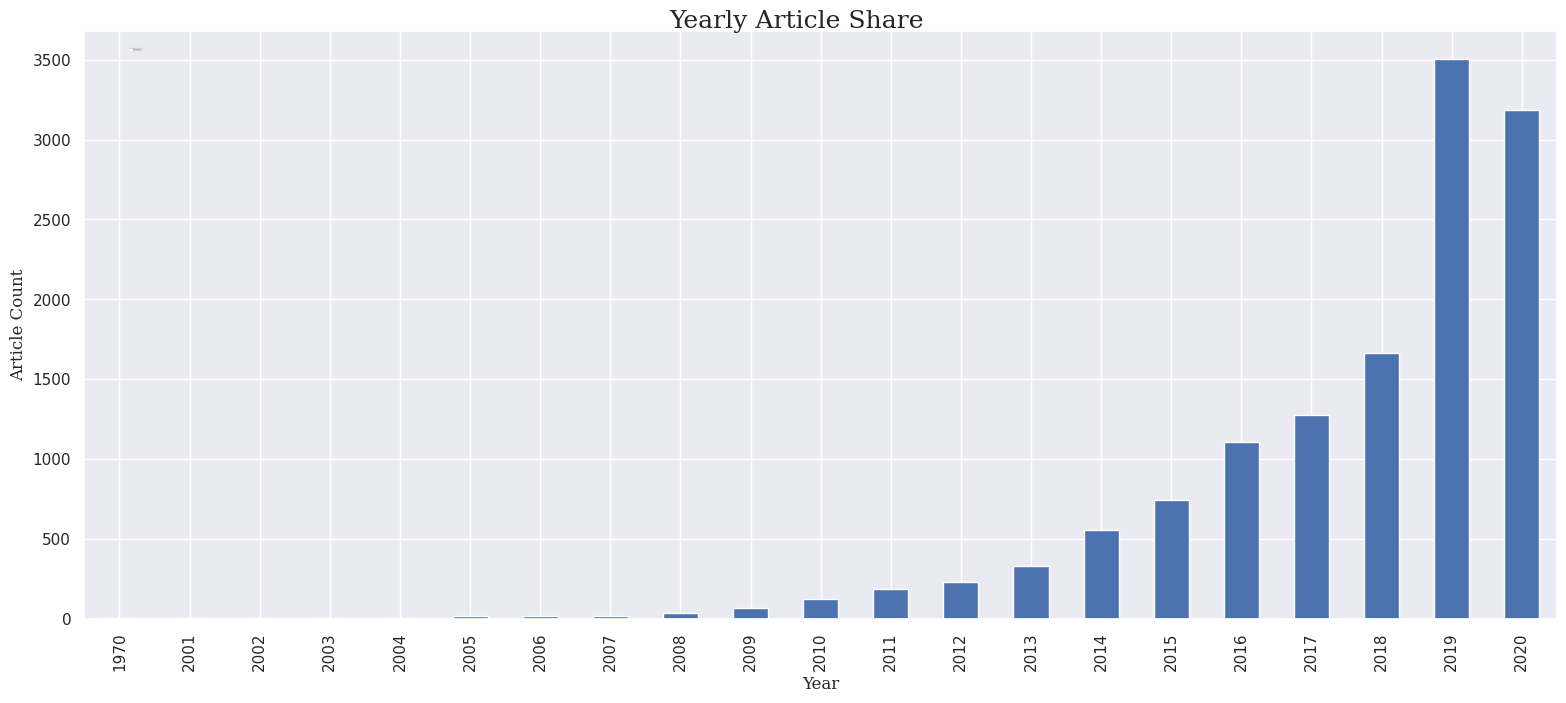

In [134]:
# Create a quick visualization of the date distribution 
#df['COUNTER'] =1   
years_dist = df.groupby(df["date"].dt.year)['COUNTER'].sum().rename_axis(["Year"]).reset_index()

ax = years_dist.plot.bar(x = 'Year')
sns.set(rc={'figure.figsize':(19,5)})

ax.set_xlabel('Year', fontsize=12, family = "Serif")
ax.set_ylabel('Article Count', fontsize=12, family = "Serif")

# Add suptitle
plt.suptitle("Yearly Article Share\n", fontsize=18, family = 'Serif', horizontalalignment = 'center')
plt.subplots_adjust(top=0.95)
# Add title
#ax.set_title('Articles published between 2015-2020', fontsize = 12, color="grey", style='italic', family = 'Serif', horizontalalignment = 'center')


font = font_manager.FontProperties(family='Serif',
                                   weight='regular',
                                   style='italic', size=0)

ax.legend(bbox_to_anchor=(.03, 0.97), loc='upper left', borderaxespad=0, prop=font)
#plt.savefig('figures/articles_temporal_dist_total.png', bbox_inches = 'tight')

In [7]:
fifyears = df[~(df['date'] < '2015-01-01')]
#fifyears.groupby(['Class', 'dat'])['COUNTER'].sum()

fifyears = fifyears.groupby([(fifyears.date.dt.year), (fifyears.date.dt.month), (fifyears.Class)])['COUNTER'].sum().rename_axis(["Year", "Month", "Class"]).reset_index()

In [8]:
#fifyears
fifyears['datetime'] = pd.to_datetime(fifyears.Year.astype(str) + '/' + fifyears.Month.astype(str) + '/01')

In [9]:
onlyyears = fifyears.groupby([(fifyears.Year), (fifyears.Class)])['COUNTER'].sum().rename_axis(["Year", "Class"]).reset_index()
onlyyears

,Year,Class,COUNTER
0,2015,Actinopteri,10
1,2015,Amphibia,24
2,2015,Aves,179
3,2015,Bivalvia,3
4,2015,Coelacanthi,6
5,2015,Elasmobranchii,9
6,2015,Insecta,1
7,2015,Mammalia,404
8,2015,Reptilia,101
9,2016,Actinopteri,20


In [19]:
from sklearn import preprocessing

pivot = pd.pivot_table(data=onlyyears, index=['Year'], columns=['Class'], values='COUNTER')


In [23]:
pivot = pivot.div(pivot.sum(axis=1), axis=0)

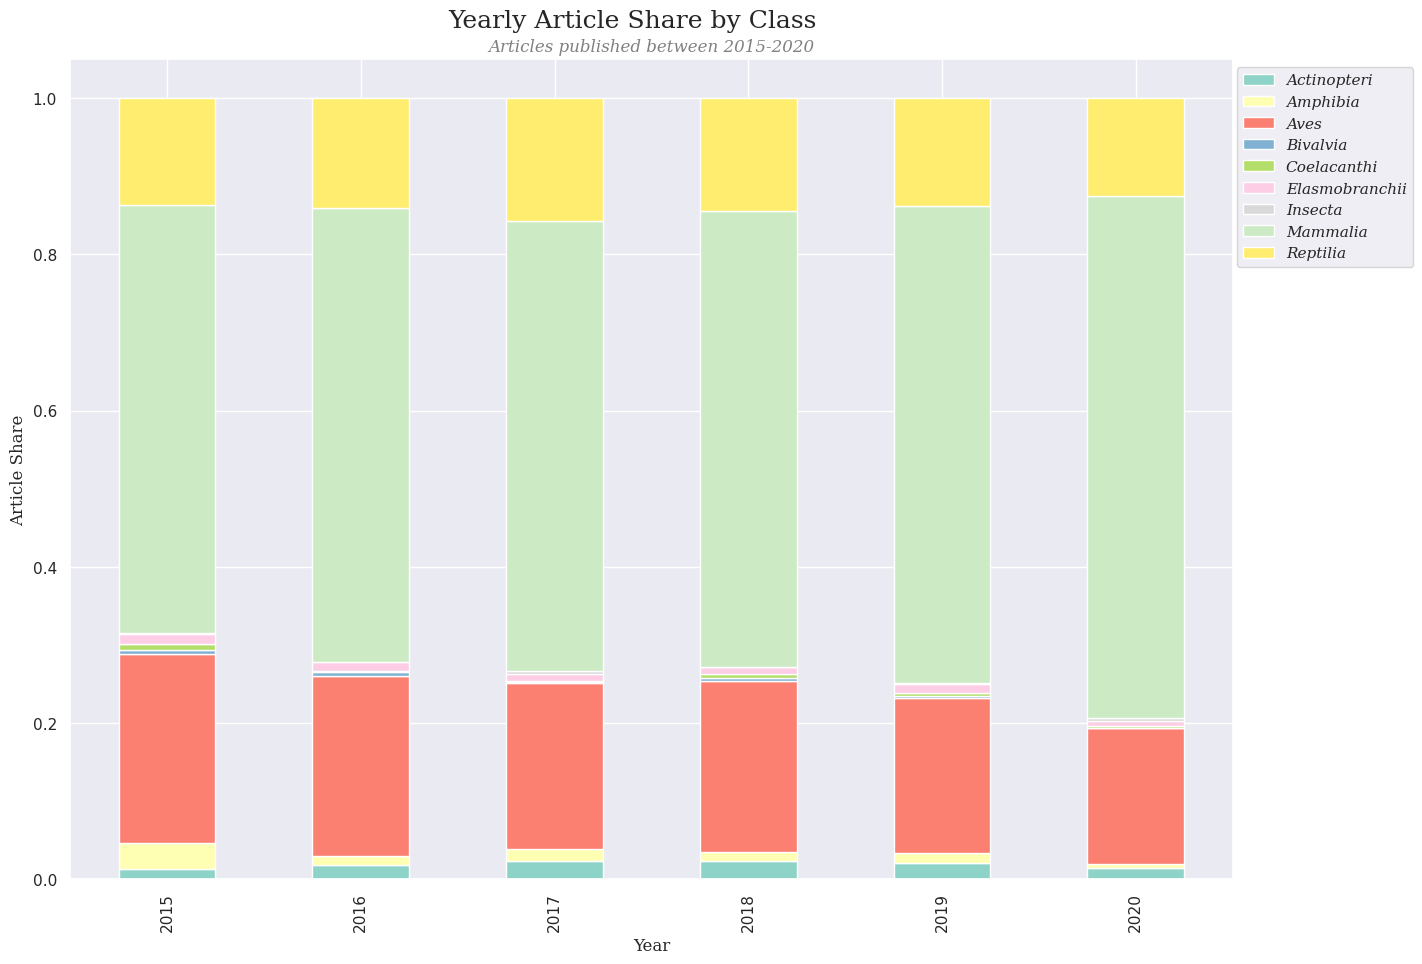

In [34]:
import seaborn as sns
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
# Import packages
import cmasher as cmr


# Take 5 colors from rainforest in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors('Set3', 
                              9, 
                              cmap_range=(0.02, .98), 
                              return_fmt='hex')

sns.set_style("darkgrid")
# create stacked bar plot of Class share per year of articles
sns.set(rc={'figure.figsize':(15,10)})

# Plot

ax = pivot.plot.bar(stacked=True, color=colors)

ax.set_xlabel('Year', fontsize=12, family = "Serif")
ax.set_ylabel('Article Share', fontsize=12, family = "Serif")

# Add suptitle
plt.suptitle("Yearly Article Share by Class\n", fontsize=18, family = 'Serif', horizontalalignment = 'center')
plt.subplots_adjust(top=0.93)
# Add title
ax.set_title('Articles published between 2015-2020', fontsize = 12, color="grey", style='italic', family = 'Serif', horizontalalignment = 'center')


font = font_manager.FontProperties(family='Serif',
                                   weight='regular',
                                   style='italic', size=11)

ax.legend(bbox_to_anchor=(1.155, 0.99), loc='upper right', borderaxespad=0, prop=font)
plt.savefig('figures/articles_temporal_classshares.png', bbox_inches = 'tight')

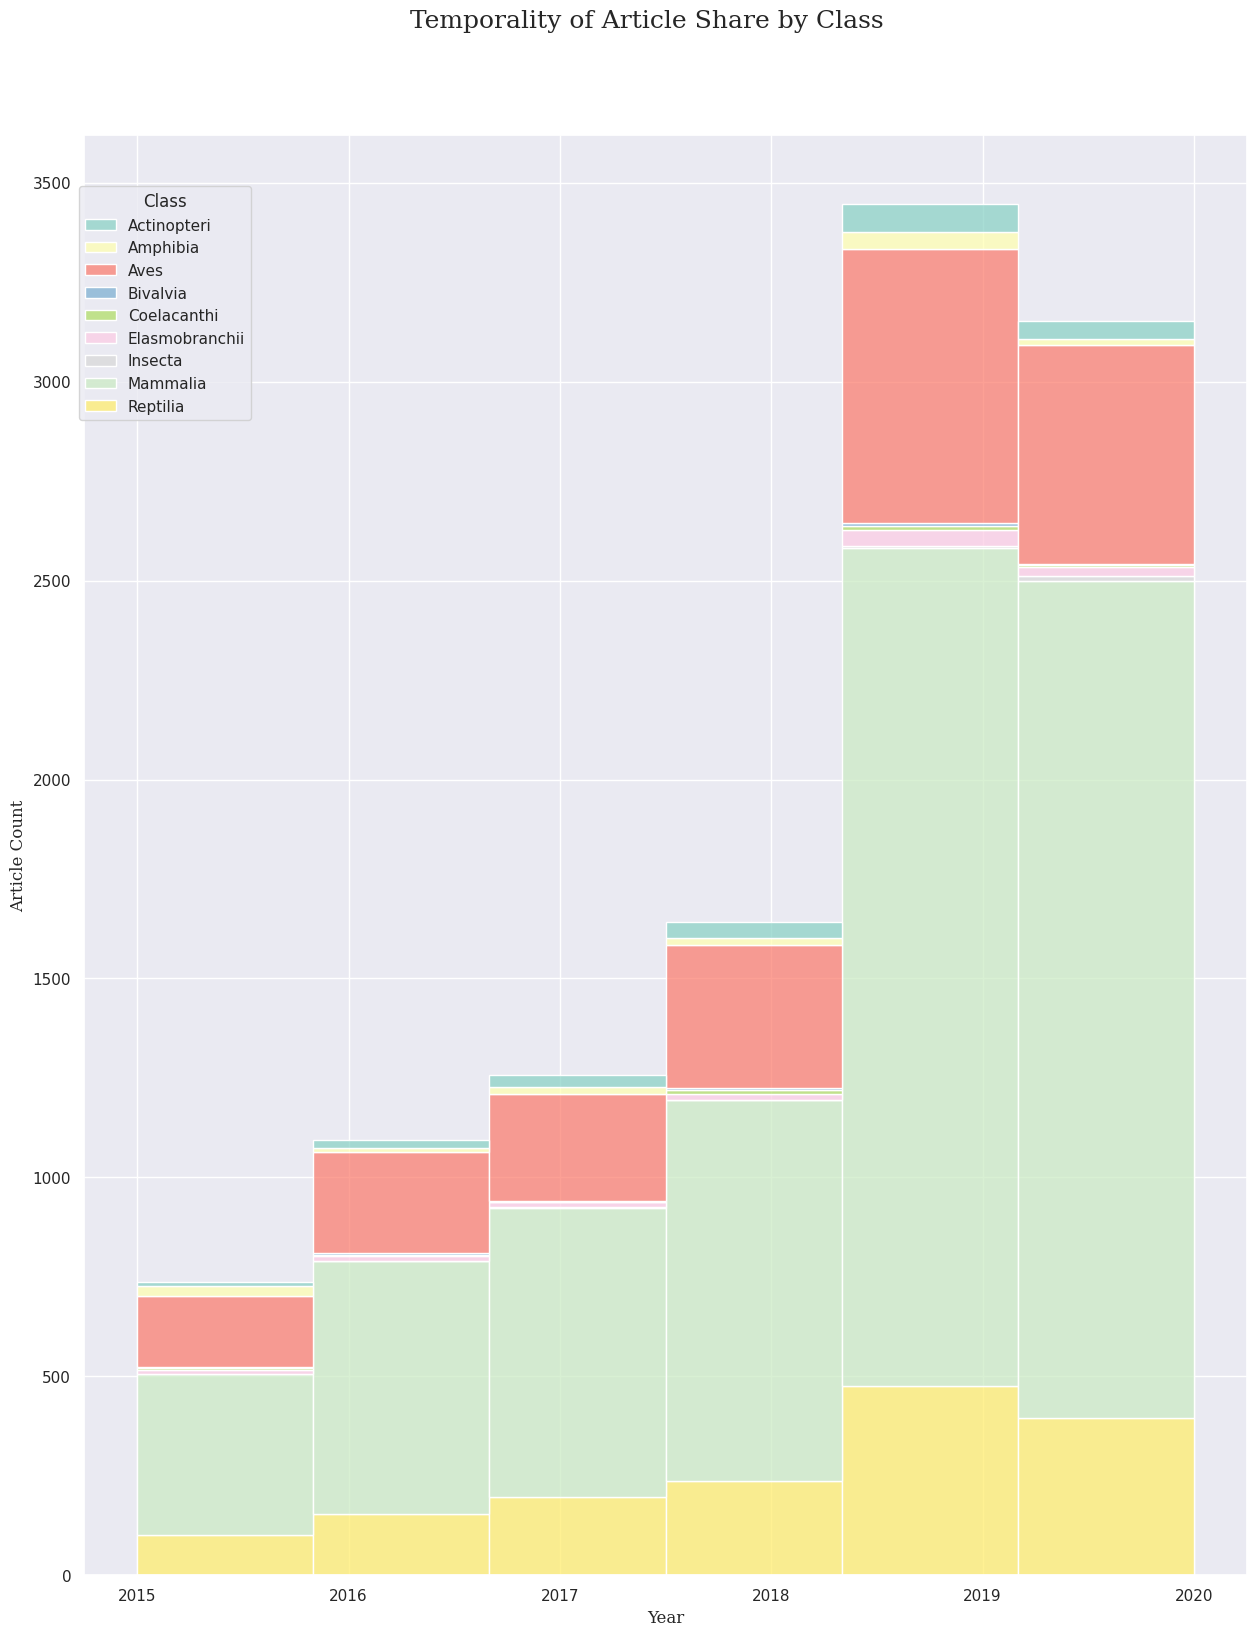

In [65]:
import seaborn as sns
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
# Import packages
import cmasher as cmr

# Take 5 colors from rainforest in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors('Set3', 
                              9, 
                              cmap_range=(0.02, .98), 
                              return_fmt='hex')

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(15,18)})

# create stacked bar chart for yearly class share in article count
ax = sns.histplot(data = onlyyears, 
                   multiple='stack',
                   x = 'Year',
                   weights = 'COUNTER',
                   hue = 'Class',
                   bins = 6,
                   palette=colors)

#ax = sns.lineplot(
   # x = 'datetime',
   # y = 'COUNTER',
   # hue = 'Class',
   # data = fifyears, 
   # marker = "o", 
   # palette = colors,
#)

ax.set_xlabel('Year', fontsize=12, family = "Serif")
ax.set_ylabel('Article Count', fontsize=12, family = "Serif")
#plt.figure(figsize=(15,6))



# Add suptitle above the title
plt.suptitle("Temporality of Article Share by Class\n", fontsize=18, family = 'Serif')
plt.subplots_adjust(top=0.91)

# Add title
#ax.set_title('English Wikipedia Pageviews, 2015-2020', fontsize = 14, color="grey", style='italic', family = 'Serif')

font = font_manager.FontProperties(family='Serif',
                                   weight='regular',
                                   style='italic', size=11)

#tick_spacing = 1
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax.tick_params(axis='x', rotation=0, length = 9, labelsize = 9, left = True)
legend = ax.get_legend()
legend.set_bbox_to_anchor((.15, 0.97))
#plt.legend(borderaxespad=0, prop=font)
#ax.legend(bbox_to_anchor=(.05, 0.97), loc='upper left', borderaxespad=0, prop=font)
#plt.savefig('figures/articles_temporal_classshares.png', bbox_inches = 'tight')

In [22]:
# Simplify the IUCN categories

df["iucn_status"].replace({"Least Concern": "LC", "Lower Risk/least concern": "LC", "Lower Risk/conservation dependent": "LC",
                                "Vulnerable" : "VU", "Near Threatened" : "NT", "Critically Endangered" : "CR",
                          "Extinct in the Wild" : "EW", "Endangered" : "EN", "Data Deficient" : "DD", 
                          "Extinct" : "EX"}, inplace=True)

df['iucn_status'].unique()

## DROP NA
df = df[ (df['iucn_status'] != 'NA') & (df['iucn_status'] != ' Brede & Rödel')]
#df.drop(df.loc[df['iucn_status'].isin(['NA'])])
#df.loc[df['scientific_name'].isin(['Perameles bougainville'])]

In [23]:
# Assigning each category a more relevant color
cmap = {'CR': 'red', 'EN': 'orange', 'VU': 'yellow', 'NT': 'green', 'LC': 'blue', "DD": "grey", "EW": "dark-grey", "EX": "black"}
colors = ['#2059BA','#FAE666','#A90A0A','#F9820B', '#128A16']

Text(0.5, 1.0, 'IUCN Status Share of Dataset')

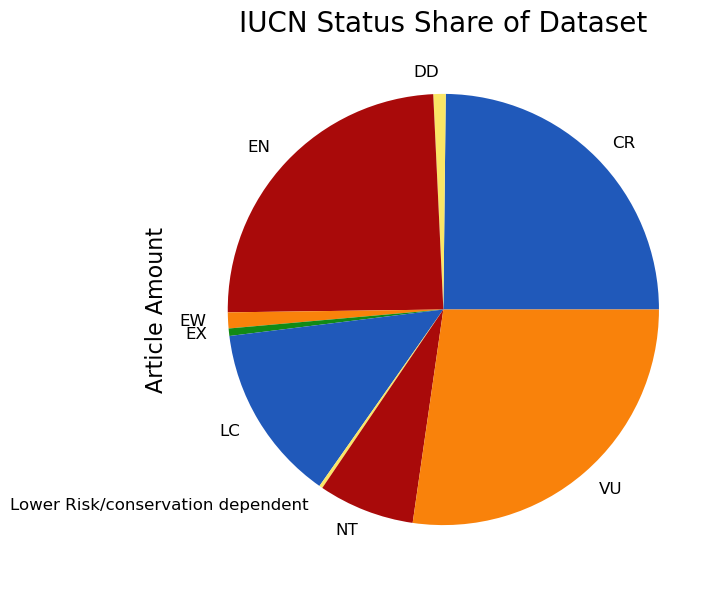

In [19]:
# Group dataframe by the scientific name that remains consistent for all rows 
grouped_i = df.groupby('iucn_status')

# Calculate the totals of the group species
article_totals_i = grouped_i.COUNTER.sum().round()


# What species are being reported on the most? 
# Create a simple bar graph displaying the amt of articles per species 
ax = article_totals_i.plot.bar(colors = colors, 
                               figsize = (7,7),
                               fontsize = 12)
ax.set_ylabel('Article Amount', fontsize=16)
ax.set_title('IUCN Status Share of Dataset', fontsize = 20)
#plt.savefig('IUCN-share.png', bbox_inches = 'tight')

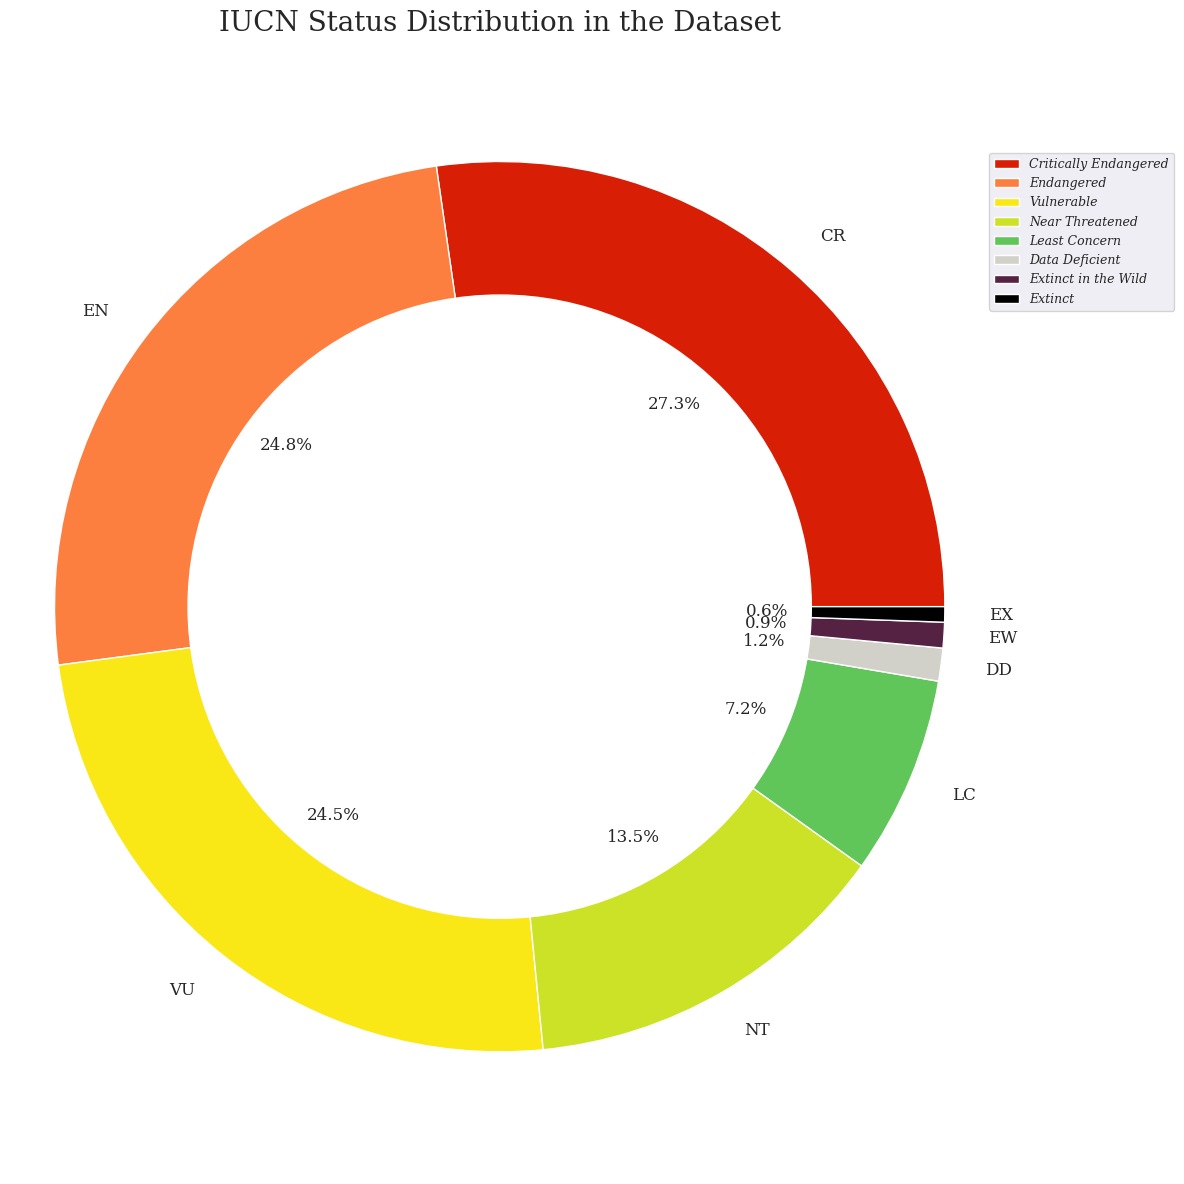

In [78]:
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker


# Color palette match to specific IUCN status values
colors = {'CR': '#d81f05', 
          'EN': '#fc7f3f', 
          'VU': '#f9e816', 
          'NT': '#cce227', 
          'LC': '#60c659', 
          "DD": "#d1d1c9", 
          "EW": "#552243", 
          "EX": "#000000"}


# Customize the legend
label_dict = {'CR': 'Critically Endangered', 
              'EN': 'Endangered', 
              'VU': 'Vulnerable', 
              'NT': 'Near Threatened', 
              'LC': 'Least Concern', 
              "DD": "Data Deficient", 
              "EW": "Extinct in the Wild", 
              "EX": "Extinct"}

# Define fontstyle for legend
label_font = {'family': 'serif',
              'size': 12,
              'weight': 'normal'}

# Defining parameters for pie chart of IUCN Status
ax = df['iucn_status'].dropna().value_counts().plot(kind = 'pie', 
                                           autopct="%1.1f%%", 
                                           figsize = (12,12), 
                                           fontsize = 12,
                                           labels=label_dict,
                                           textprops=label_font,
                                           colors=[colors[key] for key in colors])

# Define font properties for legend
font = font_manager.FontProperties(family='Serif',
                                   weight='regular',
                                   style='italic', size=9)

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(handles, [label_dict[val] for val in label_dict], 
          bbox_to_anchor=(1.0, 0.9), loc='upper left', borderaxespad=0, prop=font)

# Delete unneccessary y label 
ax.set_ylabel('')
ax.set_title('IUCN Status Distribution in the Dataset', fontsize = 20, family = 'Serif')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()

#plt.savefig('figures/IUCN_share_dataset.png', bbox_inches = 'tight')

In [32]:
# A quick look at the species' distribution
g = top_twen['article_amt'].groupby(top_twen['scientific_name'])



In [90]:
# Create a simplified version of the dataframe
smplfd = top_twen[['scientific_name', 'distribution', 'iucn_status']]
smplfd.drop_duplicates(inplace = True)
smplfd.reset_index(drop = True, inplace = True)
# Conduct merges of the dataframes
smplfd.merge(cites1, on = 'scientific_name', how = 'inner')
smplfd

In [9]:
# Read in the CITES data to join with the top 10 (or 20) most reported on species 
cites1 = pd.read_csv("csv/cites1.csv", delimiter = ';')

# Keep only most relevant columns
cites1 = cites1[['Kingdom', 'Class', 'Order', 'Family', 'Genus', 'Species', 'Scientific Name', 'Listing', 'NativeDistributionFullNames', 'Extinct_Distribution']]

cites1 = cites1.rename(columns = {'Scientific Name' : 'scientific_name'})

# Do the same for the entire dataframe
df = df.merge(cites1, on = 'scientific_name', how = 'inner')

In [13]:
df = df.drop_duplicates()

In [42]:
# Group dataframe by the Kingdom that remains consistent for all rows 
grouped_k = df.groupby('Kingdom')

# Calculate the totals of the group Kingdom
article_totals_k = grouped_k.article_amt.sum().round()

In [ ]:
# What Kingdom is being reported on the most? 
# Create a simple pie chart displaying the amt of articles per Kingdom
ax = df.plot.pie(y = 'Kingdom', autopct="%1.1f%%", figsize = (7,7), fontsize = 12)
ax.set_ylabel('Articles', labelpad = 35, fontsize=16)
ax.set_title('Kingdom Share ', fontsize = 20)
#plt.savefig('Kingdom-Share.png', bbox_inches = 'tight')


In [23]:
species_basic = df.groupby(["scientific_name", "Kingdom", "Class"])['COUNTER'].count().reset_index()

In [35]:
species_basic.sort_values(by = "COUNTER")

,scientific_name,Kingdom,Class,COUNTER
435,Pseudochelidon sirintarae,Animalia,Aves,1
443,Pteropus samoensis,Animalia,Mammalia,1
90,Brookesia perarmata,Animalia,Reptilia,1
442,Pteropus pelewensis,Animalia,Mammalia,1
441,Pteropus mariannus,Animalia,Mammalia,1
...,...,...,...,...
401,Platanista gangetica,Animalia,Mammalia,87
476,Semnopithecus entellus,Animalia,Mammalia,88
383,Perameles bougainville,Animalia,Mammalia,91
454,Rhinoceros unicornis,Animalia,Mammalia,92


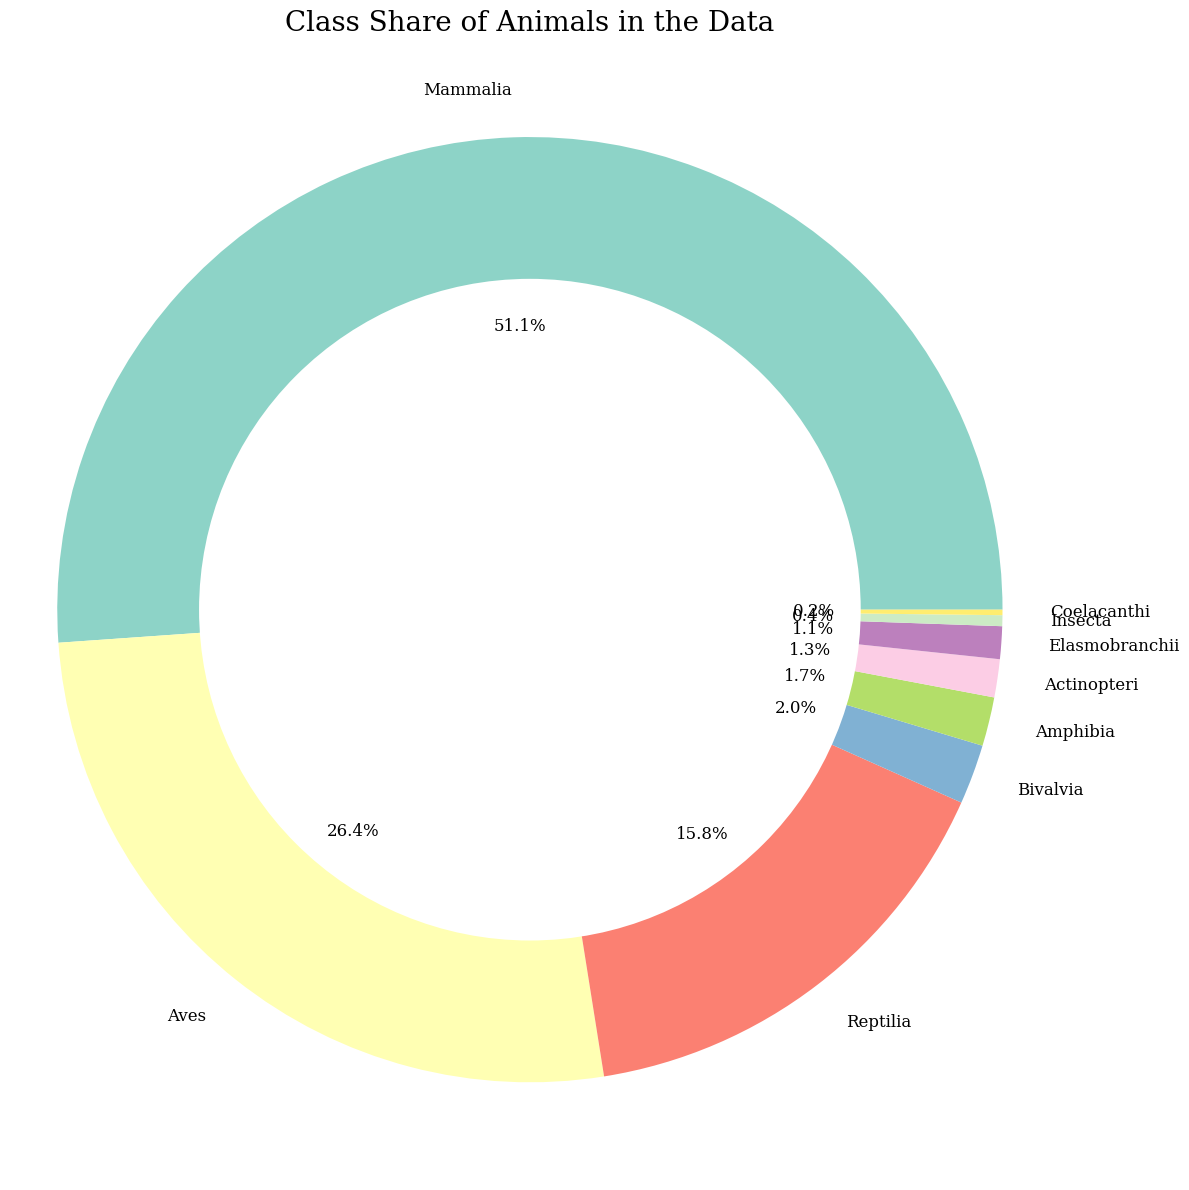

In [33]:
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker


# Define fontstyle for legend
label_font = {'family': 'serif',
              'size': 12,
              'weight': 'normal'}


# Defining parameters for pie chart of IUCN Status
ax = species_basic['Class'].dropna().value_counts().plot(kind = 'pie', 
                                           autopct="%1.1f%%", 
                                           figsize = (12,12), 
                                           fontsize = 12,
                                           #labels=label_dict,
                                           textprops=label_font,
                                           cmap = "Set3"
                                                )

# Define font properties for legend
font = font_manager.FontProperties(family='Serif',
                                   weight='regular',
                                   style='italic', size=9)



# Delete unneccessary y label 
ax.set_ylabel('')
ax.set_title('Class Share of Animals in the Data', fontsize = 20, family = 'Serif')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()

plt.savefig('figures/Class_share_dataset.png', bbox_inches = 'tight')

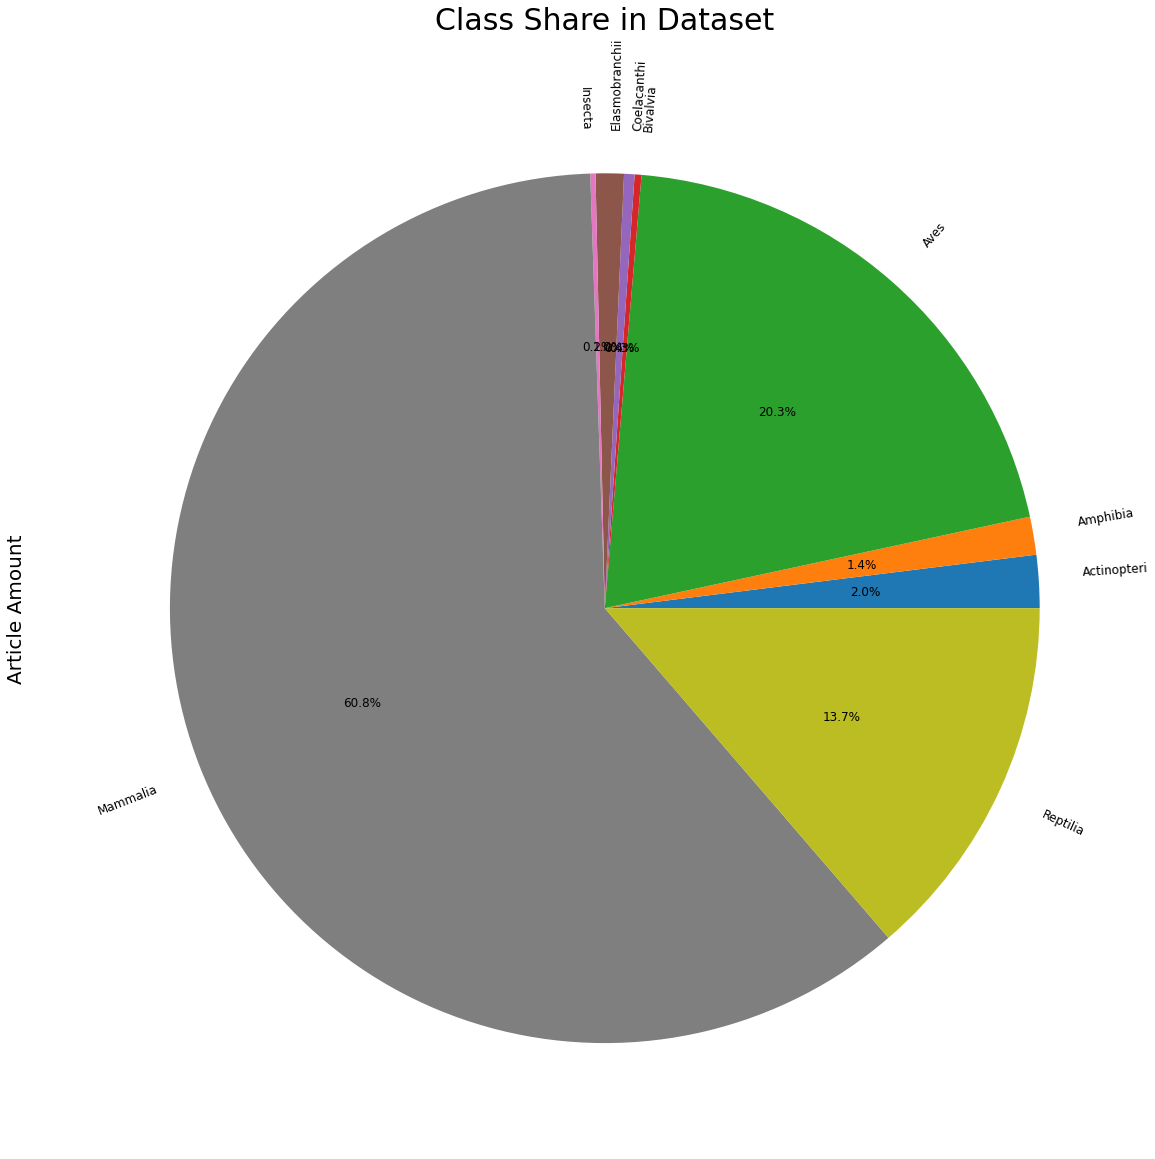

In [70]:
# Group dataframe by the Class that remains consistent for all rows 
grouped_c = df.groupby('Class')

# Calculate the totals of the Classes
article_totals_c = grouped_c.article_amt.sum().round()


# What Class is being reported on the most? 
# Create a simple pie graph displaying the amt of articles per species 
ax = article_totals_c.plot.bar(figsize = (20,20), autopct="%1.1f%%", fontsize = 12, rotatelabels=True)

ax.set_ylabel('Article Amount', labelpad = 35, fontsize=20)
ax.set_title('Class Share in Dataset', pad = 35, fontsize = 30)
plt.savefig('class-share.png', bbox_inches = 'tight')

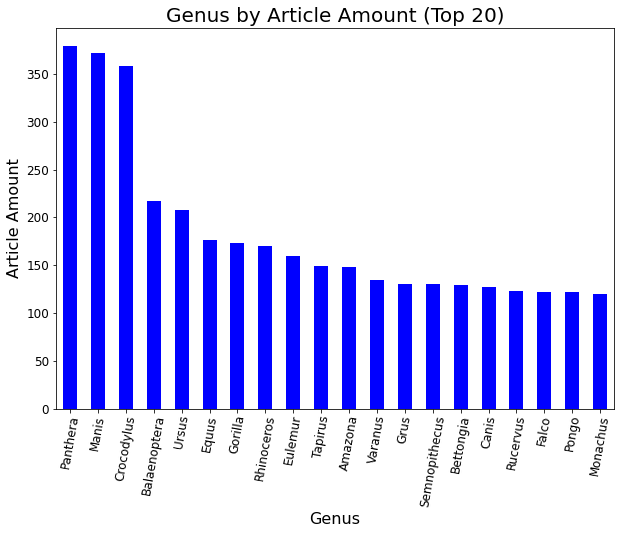

In [78]:
# Group dataframe by the scientific name that remains consistent for all rows 
grouped_G = df.groupby('Genus')

# Calculate the totals of the group species
article_totals_G = grouped_G.article_amt.sum().round()


# What species are being reported on the most? 
# Create a simple bar graph displaying the amt of articles per species 
ax = article_totals_G.nlargest(20).plot.bar(color = 'blue', figsize = (10,7), fontsize = 12)
ax.set_xlabel('Genus', fontsize=16)
ax.set_ylabel('Article Amount', fontsize = 16)
ax.set_title('Genus by Article Amount (Top 20)', fontsize = 20)
ax.tick_params(axis='x', rotation=80, left = True, pad = 2)
plt.savefig('top_20_genus.png', bbox_inches = 'tight')

## Text with Links and FB engangement

In [9]:
import pandas as pd
#import geopandas as gpd
import json
from ast import literal_eval
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("updated_articles_w_engangement.csv", sep = ";")
df['date'] = pd.to_datetime(df['date'])
# Sort by oldest to newest
df = df.sort_values(by="date")
df['scientific_name'].nunique()

array(['Hylobates moloch', 'Rhinoceros sondaicus', 'Asarcornis scutulata',
       'Equus grevyi', 'Leucopsar rothschildi', 'Pristis microdon',
       'Peristeria elata', 'Nycticebus coucang', 'Latimeria chalumnae',
       'Sotalia fluviatilis', 'Pangasianodon gigas',
       'Babyrousa babyrussa', 'Gorilla gorilla', 'Tapirus pinchaque',
       'Leopardus wiedii', 'Equus przewalskii', 'Naemorhedus baileyi',
       'Hylobates muelleri', 'Acrantophis dumerili', 'Anas laysanensis',
       'Caracal caracal', 'Nectophrynoides asperginis',
       'Eulemur albifrons', 'Propithecus verreauxi', 'Pan paniscus',
       'Melanosuchus niger', 'Andrias davidianus', 'Falco rusticolus',
       'Pardofelis marmorata', 'Atelopus zeteki',
       'Encephalartos transvenosus', 'Berardius bairdii',
       'Alouatta pigra', 'Eulemur fulvus', 'Chlamydotis macqueenii',
       'Lipotes vexillifer', 'Phoebastria albatrus', 'Saussurea costus',
       'Felis nigripes', 'Eubalaena japonica', 'Sphenodon punctatus',
  

In [52]:
df['re'] = df['url'].apply(lambda x: (re.search("https://(.*)\.co", x)))
#df['re'].apply(lambda x: x.group(1))


In [53]:
# loop over the dataframe for each regex result
# if no group found append NaN as string and the index number
colect = []
for n in range(len(df)):
    try:
        found = df['re'][n].group(1)
        colect.append((n, found))
    except AttributeError:
        colect.append((n, 'NaN'))
        pass
    

In [64]:
# Create a new dataframe of the extracted journal names and concantenate to the og dataframe
journals = pd.DataFrame(colect).rename(columns = {1 : "journals"}).drop(columns = 0)
df = pd.concat([df, journals], axis = 1)

In [73]:
# Extract top 20 journals according to article count
top20journals = df.groupby('journals')['COUNTER'].sum().sort_values(ascending = False).nlargest(21).reset_index()

In [75]:
# Save to csv
top20journals.to_csv("csv/top20journals.csv", sep = ";", index = False)